In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config = config)

In [3]:
# import keras
# import tensorflow as tf
# config = tf.compat.v1.ConfigProto(device_count = {'GUP': 1, 'CPU' : 56})
# sess = tf.compat.v1.Session(config=config)
# keras.backend.set_session(sess)

(50, 50)


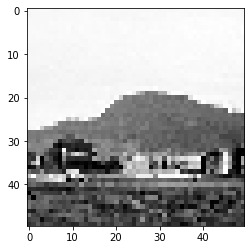

In [4]:
DataDir='C:/Users/Besitzer/Desktop/Neural_network/archive/seg_train/'#please change the path of deírectory as per data storage location
Categories=['buildings','forest','glacier','mountain','sea','street']

for categories in Categories:
    path=os.path.join(DataDir+categories)#submerged path to all subdirectories
    for img in os.listdir(path):  
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array,cv2.COLOR_RGB2GRAY)
        img_array=cv2.resize(img_array,(50,50))
        plt.imshow(img_array,cmap=plt.get_cmap('gray'))
        break
    break 
print(img_array.shape)       

In [5]:
traing_data=[]
def creating_training_data():
    for categories in Categories:
        path=os.path.join(DataDir+categories)#submerged path to all subdirectories
        class_num=Categories.index(categories)
        for img in os.listdir(path):  
            try:
                img_array=cv2.imread(os.path.join(path,img))
                img_array=cv2.cvtColor(img_array,cv2.COLOR_RGB2GRAY)
                img_array=cv2.resize(img_array,(50,50))
                traing_data.append([img_array,class_num])
            except Exception as e:
                pass

                
creating_training_data()


In [6]:
random.shuffle(traing_data)#mixes all subdirectories

In [7]:
X_data=[]
y_data=[]
for item in traing_data:
    X_data.append(item[0])
    y_data.append(item[1])
    
# print(len(X_data))
# print(y_data[0:10])

X_data=np.array(X_data).reshape(-1,50,50,1)
y_data=np.array(y_data)
# X_data.shape
# y_data.shape


In [8]:
#OneHotEncoder
cls=len(Categories)
# print(cls)
y_data=to_categorical(y_data,num_classes=cls)
len(y_data)

14034

In [9]:
X_train,X_valid,y_train,y_valid=train_test_split(X_data,y_data,train_size=0.8,random_state=40)
X_train=X_train/255
X_valid=X_valid/255
# print(len(X_train))
# print(len(y_train))
# print(len(X_valid))
# print(len(y_valid))
print(X_train.shape)
      

(11227, 50, 50, 1)


In [10]:
def LeNet_model():
    
    model=Sequential()
    model.add(Conv2D(32, kernel_size=(3,3),input_shape=(50,50,1),activation='relu'))
    model.add(Conv2D(16, kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Conv2D(32, kernel_size=(2,2),activation='relu'))
    model.add(Conv2D(32, kernel_size=(2,2),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(200,activation='relu'))
    model.add(Dropout(0.5))
#     model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(cls,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model=LeNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                    

C:\Users\Besitzer\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
h=model.fit(x=X_train,y=y_train,validation_data=(X_valid,y_valid),batch_size=200,epochs=20,verbose=1,shuffle=True)

Epoch 1/20
57/57 [==============================] - 14s 107ms/step - loss: 1.5145 - accuracy: 0.3570 - val_loss: 1.2383 - val_accuracy: 0.5052
Epoch 2/20
57/57 [==============================] - 5s 92ms/step - loss: 1.2297 - accuracy: 0.5057 - val_loss: 1.0830 - val_accuracy: 0.5843
Epoch 3/20
57/57 [==============================] - 5s 93ms/step - loss: 1.1256 - accuracy: 0.5481 - val_loss: 1.0484 - val_accuracy: 0.5932
Epoch 4/20
57/57 [==============================] - 5s 92ms/step - loss: 1.0564 - accuracy: 0.5751 - val_loss: 1.0230 - val_accuracy: 0.5903
Epoch 5/20
57/57 [==============================] - 5s 93ms/step - loss: 1.0188 - accuracy: 0.6020 - val_loss: 0.9202 - val_accuracy: 0.6519
Epoch 6/20
57/57 [==============================] - 5s 94ms/step - loss: 0.9906 - accuracy: 0.6181 - val_loss: 0.8992 - val_accuracy: 0.6452
Epoch 7/20
57/57 [==============================] - 5s 94ms/step - loss: 0.9222 - accuracy: 0.6486 - val_loss: 0.8529 - val_accuracy: 0.6815
Epoch 8/20


<ipython-input-12-2ef640aafd3d>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Accuracy',fontWeight='bold')


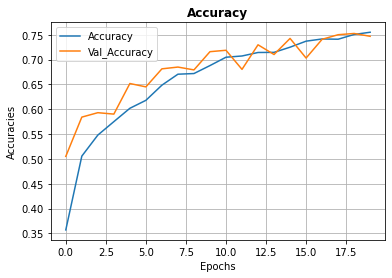

In [12]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Accuracy',fontWeight='bold')
plt.legend(['Accuracy','Val_Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.axis(True)
plt.grid(True)

<ipython-input-13-ebcc3641b031>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Losses',fontWeight='bold')


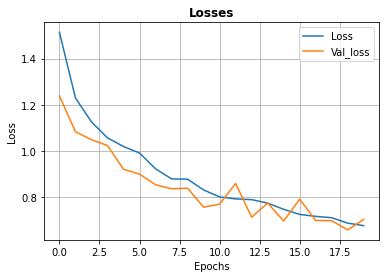

In [13]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Losses',fontWeight='bold')
plt.legend(['Loss','Val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.axis(True)
plt.grid(True)

In [16]:
Categories=['buildings','forest','glacier','mountain','sea','street']
Datadir='C:/Users/Besitzer/Desktop/Neural_network/archive/seg_test/'##please change the path of deírectory as per data storage location
test_image=[]
for category in Categories:
    path=os.path.join(Datadir+category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.resize(img_array,(50,50))
        img_array=cv2.cvtColor(img_array,cv2.COLOR_RGB2GRAY)
        new_array=np.array(img_array).reshape(-1,50,50,1)
        test_image.append(new_array)
print(len(test_image))

3000


(1, 50, 50, 1)
glacier


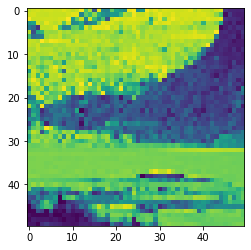

In [37]:
random_test=test_image[random.randint(0,len(test_image))]
print(random_test.shape)
prediction=np.argmax(model.predict(random_test),axis=1)
print(Categories[int(prediction)])
# random_test=random_test*255
img = random_test.reshape((50,50,1))
plt.imshow(img)
plt.show()